In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing dataset
titanic=pd.read_csv(r"C:\Users\SHRUTHI\OneDrive\Desktop\FSDS\Assignments\projects\projects to do\pj-11 titanic DA\titanic dataset.csv")

In [4]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Performing Data Cleaning and Analysis**
1. Understanding meaning of each coloumn: Data Dictionary: Variable description
   * Survived - Survived (1) or died (0)
   * Pclass - Passenger’s class (1 = 1st, 2 = 2nd, 3 = 3rd)
   * Name - Passenger’s name
   * Sex - Passenger’s sex
   * Age - Passenger’s age
   * SibSp - Number of siblings/spouses aboard
   * Parch - Number of parents/children aboard (Some children travelled only with a nanny therefore parch=0 for them.)
   * Ticket - Ticket number
   * Fare - Fare
   * Cabin - Cabin
   * Embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
3. Analysing which columns are completely useless in predicting the survival and deleting them.

Note - Don't just delete the columns because you are not finding it useful. Or focus is not on deleting the columns. Our focus is on analysing how each column is affecting the result or the prediction and in accordance with that deciding whether to keep the column or to delete the column or fill the null values of the column by some values and if yes, then what values.

In [6]:
titanic.shape

(891, 12)

In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# The column name can never describe the survival of a person, hemce we can delete it.
del titanic['Name']
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic=titanic.drop(columns=['Ticket','Fare','Cabin'])
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [10]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
# Changing Value for 'male, female' string values to numeric values, male=1 and female=2
def getNumber(str):
    if str=='male':
        return 1
    else:
        return 2
        
titanic['Gender']=titanic['Sex'].apply(getNumber)
titanic.head()



# we created a column called 'Gender' and filling it with values 1,2 based on the values of sex column.


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,male,22.0,1,0,S,1
1,2,1,1,female,38.0,1,0,C,2
2,3,1,3,female,26.0,0,0,S,2
3,4,1,1,female,35.0,1,0,S,2
4,5,0,3,male,35.0,0,0,S,1


In [12]:
del titanic['Sex']
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Gender
0,1,0,3,22.0,1,0,S,1
1,2,1,1,38.0,1,0,C,2
2,3,1,3,26.0,0,0,S,2
3,4,1,1,35.0,1,0,S,2
4,5,0,3,35.0,0,0,S,1


In [13]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Embarked         2
Gender           0
dtype: int64

**Fill the null values of the Age column.**

Fill mean Survived age(mean age of the survived people) in the column where the person has survived and mean not Survived age (mean age of the people who have not survived) in the column where person has not survived.

In [15]:
meanS=titanic[titanic.Survived==1].Age.mean()
meanNS=titanic[titanic.Survived==0].Age.mean()
print('mean Survuved age is',meanS,' and mean not Survuved age is',meanNS)

mean Survuved age is 28.343689655172415  and mean not Survuved age is 30.62617924528302


**Creating a New Age Column.**

filling values in it with a condition if goes True then given values (here meanS) is put in place of last values else nothing happens, simply the values are copied from the "Age" column of the dataset.

In [17]:
titanic['age']=np.where(pd.isnull(titanic.Age) & titanic['Survived']==1, meanS, titanic['Age'])
titanic.age.fillna(meanNS, inplace=True)
del titanic['Age']
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


To check if 'Embarked' column is important for analysis or not, that is whether survival of the person depends on 'Embarked' column value or not

In [19]:
# finding the number of people who have survived given that they have embarked or boarded from particular part.
surQ=titanic[titanic.Embarked=='Q'][titanic.Survived==1].shape[0]
surC=titanic[titanic.Embarked=='C'][titanic.Survived==1].shape[0]
surS=titanic[titanic.Embarked=='S'][titanic.Survived==1].shape[0]
print(surQ,surC,surS, sep='\n')

30
93
217


In [20]:
# finding the number of people who have not survived given that they have embarked or boarded from particular part.
nsurQ=titanic[titanic.Embarked=='Q'][titanic.Survived==0].shape[0]
nsurC=titanic[titanic.Embarked=='C'][titanic.Survived==0].shape[0]
nsurS=titanic[titanic.Embarked=='S'][titanic.Survived==0].shape[0]
print(nsurQ,nsurC,nsurS, sep='\n')

47
75
427


As there are significant changes in the survival rate based on which port the passengers aboard the ship. We cannot delete the whole embarked column(It is useful). Now the Embarked column has some null values in it and hence we can safely say that deleting some rows from total rows will not affect the result. So rather than trying to fill those null values with some vales. We can simply remove them.

In [22]:
titanic.dropna(inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Gender,age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [23]:
titanic.shape

(889, 8)

In [47]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Embarked       0
Gender         0
age            0
dtype: int64

In [49]:
# Renaming 'age' and 'gender' columns.
titanic.rename(columns={'age':'Age','Gender':'Sex'},inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Sex,Age
0,1,0,3,1,0,S,1,22.0
1,2,1,1,1,0,C,2,38.0
2,3,1,3,0,0,S,2,26.0
3,4,1,1,1,0,S,2,35.0
4,5,0,3,0,0,S,1,35.0


In [51]:
def getEmb(str):
    if str=='S':
        return 1
    elif str=='Q':
        return 2
    else:
        return 3
        
titanic['Embark']=titanic['Embarked'].apply(getEmb)
del titanic['Embarked']
titanic.rename(columns={'Embark':'Embarked'},inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Sex,Age,Embarked
0,1,0,3,1,0,1,22.0,1
1,2,1,1,1,0,2,38.0,3
2,3,1,3,0,0,2,26.0,1
3,4,1,1,1,0,2,35.0,1
4,5,0,3,0,0,1,35.0,1


577
312


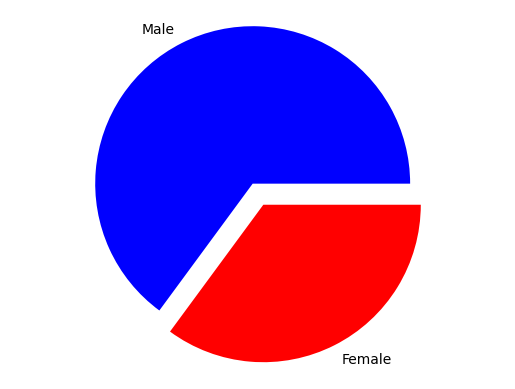

In [71]:
# Drawing a pie chart for number of males and females aboard
# importing required libraries
import matplotlib.pyplot as plt
from matplotlib import style
# Summing all the values of column gender with a condition for male and similarly for females.
males=(titanic['Sex']==1).sum()
females=(titanic['Sex']==2).sum()
print(males,females,sep='\n')
# plotting
plt.pie([males,females], # giving a array
       labels=['Male','Female'], # Giving labels that corresponds to columns.
       colors=['blue','red'], # corresponding colors according to gender.
       explode=(0.15,0), # How much gap should be present between pies
       startangle=0) # what starting angle of the pie should be.
plt.axis('equal')
plt.show()


109
468
231
81


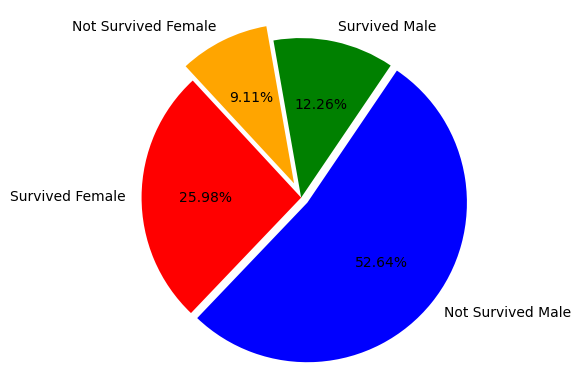

In [81]:
# A more precise chart to show the survival of male anf female on board.
maleS=titanic[titanic.Sex==1][titanic.Survived==1].shape[0]
maleNS=titanic[titanic.Sex==1][titanic.Survived==0].shape[0]
femaleS=titanic[titanic.Sex==2][titanic.Survived==1].shape[0]
femaleNS=titanic[titanic.Sex==2][titanic.Survived==0].shape[0]
print(maleS,maleNS,femaleS,femaleNS,sep='\n')

# pie plot
chart=[maleS,maleNS,femaleS,femaleNS]
labels=['Survived Male','Not Survived Male','Survived Female','Not Survived Female']
colors=['green','blue','red','orange']
explode=[0,0.05,0,0.1]
plt.pie(chart,labels=labels,colors=colors,explode=explode,startangle=100,counterclock=False, autopct='%.2f%%')
plt.axis('equal')
plt.show()